In [6]:
#introduction to regression with neural networks in tensorflow


Predecting a numerical variable based on some other combination of variables.


Or just predecting a number


In [7]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


Creating data to view and fit

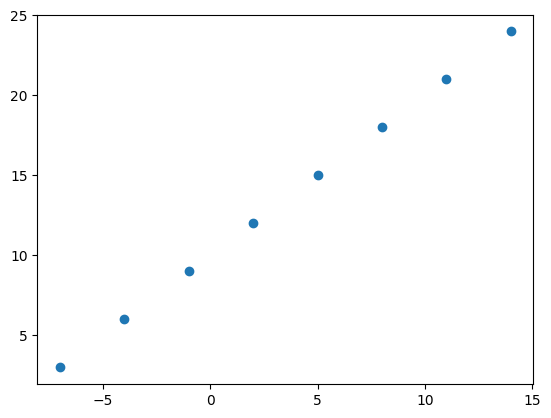

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0 , -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

#create labels
y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0 ,24.0])

#visualize it
plt.scatter(X , y)

In [9]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [10]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
#Input and output shapes


In [12]:
#create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom" , "bathroom" , "garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [13]:
input_shape = X.shape
output_shape = y.shape
input_shape , output_shape

((8,), (8,))

In [14]:
X[0] , y[0]

(-7.0, 3.0)

In [15]:
X[1] , y[1]

(-4.0, 6.0)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

((), ())

In [17]:
X[0] , y[0]

(-7.0, 3.0)

In [18]:
#turn out numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

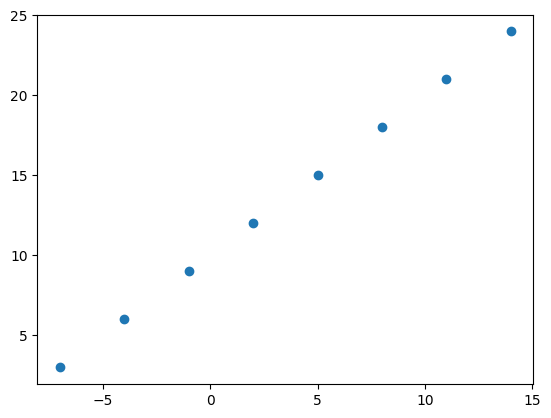

In [19]:
plt.scatter(X , y)

steps in modelling with tensorflow
1. **Creating a model **- piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).



2)Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).


3)Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [20]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 591ms/step - loss: 20.3539 - mae: 20.3539
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 20.0727 - mae: 20.0727
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 19.7914 - mae: 19.7914
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 19.5102 - mae: 19.5102
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 19.2289 - mae: 19.2289


In [21]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[-20.1222]], dtype=float32)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 15.8528 - mae: 15.8528
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 15.5715 - mae: 15.5715
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 15.2903 - mae: 15.2903
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 15.0090 - mae: 15.0090
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8035 - mae: 14.8035
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 14.6710 - mae: 14.6710
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5385 - mae: 14.5385
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.4060 - mae: 14.4060
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2735 - mae: 14.2735
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1410 - mae: 14.1410
Epoch 11/100
1/1 [==============================

In [24]:
# Remind ourselves of what X and y are
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [25]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)


1/1 [==============================] - 0s 102ms/step


array([[29.525475]], dtype=float32)

Evaluating a model


A typical workflow you'll go through when building neural networks is:


Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...


Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [26]:
#make a bigger dataset
X = np.arange(-100 , 100 , 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [27]:
#Make labels for the dataset
y = np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [28]:
#same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).



In [29]:
#check how many samples we have
len(X)


50

In [30]:
#split data into train and test sets
X_train = X[:40] #first 40 examples
y_train = y[:40]

X_test = X[40:] #last 10 examples
y_test = y[40:]

len(X_train) , len(X_test)

(40, 10)

Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

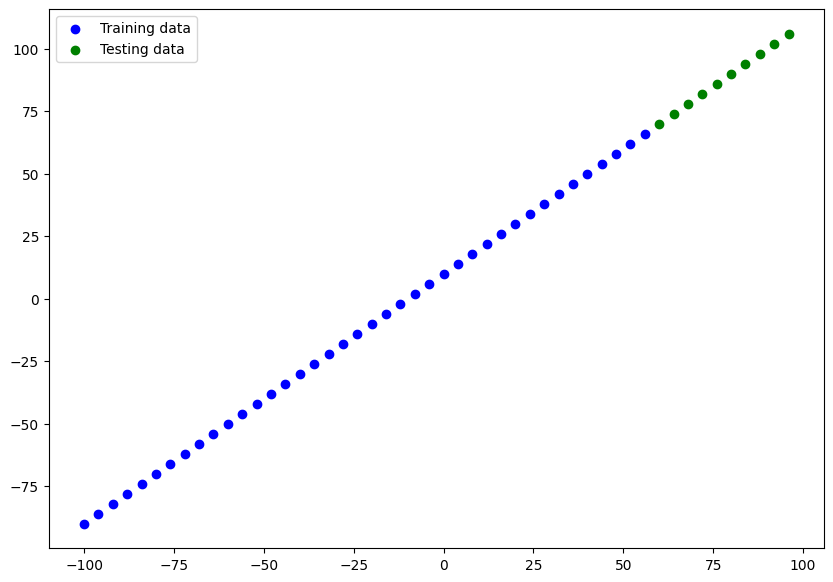

In [31]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1 , input_shape=[1])])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train , y_train , epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 16.9783 - mae: 16.9783
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 12.6771 - mae: 12.6771
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2772 - mae: 11.2772
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5605 - mae: 9.5605
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4697 - mae: 10.4697
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.6954 - mae: 9.6954
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 8.7914 - mae: 8.7914
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0589 - mae: 9.0589
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.3128 - mae: 19.3128
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.4234 - mae: 10.4234
Epoch 11/100
2/2 [==============================] - 0s 8ms/

In [33]:
#visualize the model
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [37]:
# View the predictions
y_preds

array([[ 63.01554 ],
       [ 67.216576],
       [ 71.41761 ],
       [ 75.618645],
       [ 79.81969 ],
       [ 84.02072 ],
       [ 88.221756],
       [ 92.42279 ],
       [ 96.623825],
       [100.82486 ]], dtype=float32)

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

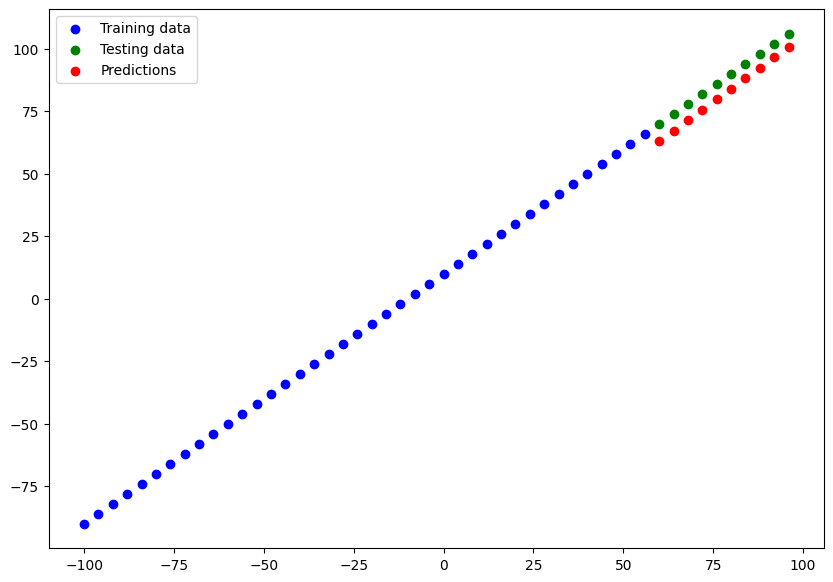

In [39]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 433ms/step - loss: 6.0798 - mae: 6.0798


[6.079798698425293, 6.079798698425293]

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([24.984459, 20.783424, 16.865911, 13.828814, 11.672125, 10.395856,
       10.      , 10.484558, 11.84953 , 14.094915], dtype=float32)>

In [42]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [43]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [44]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [45]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 63.01554 ,  67.216576,  71.41761 ,  75.618645,  79.81969 ,
         84.02072 ,  88.221756,  92.42279 ,  96.623825, 100.82486 ],
       dtype=float32))

In [46]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.0797987>

In [47]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=37.29738>

In [48]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [49]:
#model-1
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 9.3558 - mae: 9.3558
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 9.8961 - mae: 9.8961
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 10.6126 - mae: 10.6126
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.5901 - mae: 9.5901
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 10.5043 - mae: 10.5043
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 9.7255 - mae: 9.7255
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.8164 - mae: 8.8164
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0592 - mae: 9.0592
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 19.3786 - mae: 19.3786
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.4587 - mae: 10.4587
Epoch 11/100
2/2 [==============================] - 0s 12ms/s

1/1 [==============================] - 0s 79ms/step


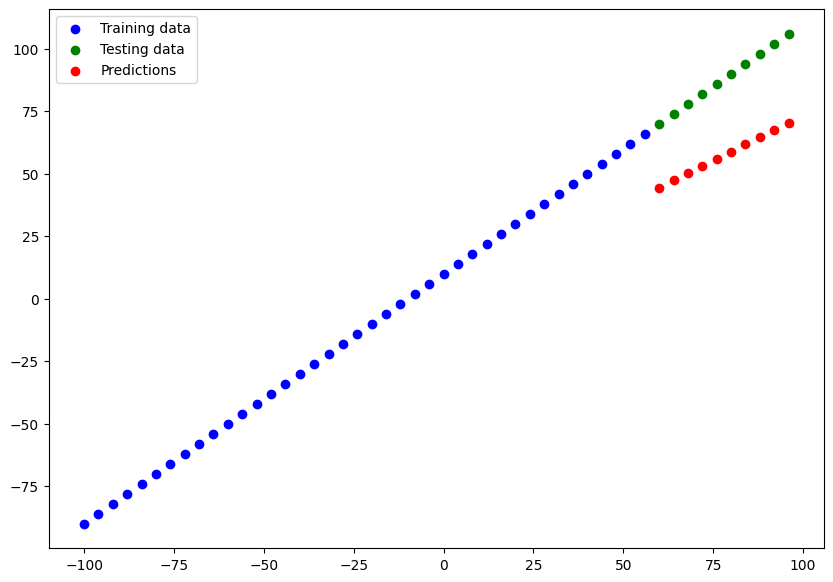

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [51]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 125ms/step


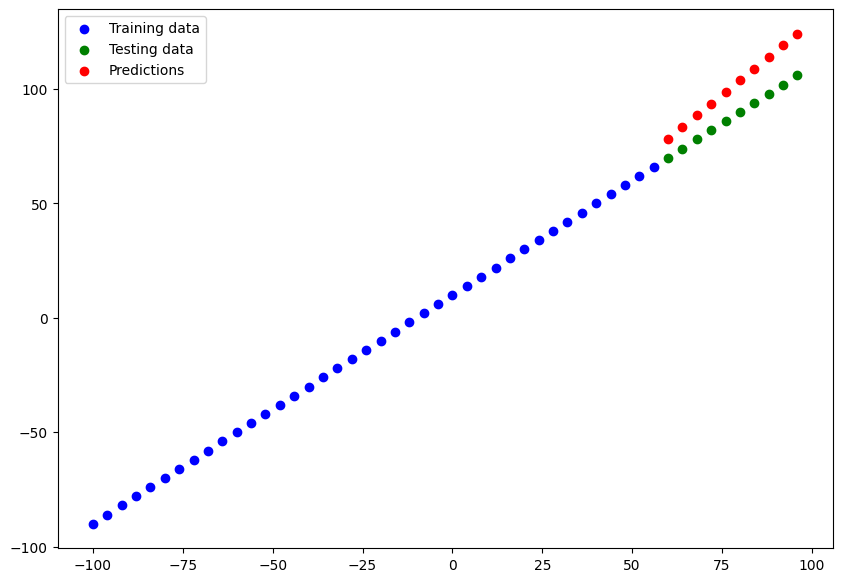

In [52]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)


In [ ]:
#model_3
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

In [57]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


NameError: ignored

In [58]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

NameError: ignored

comparing results

In [59]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

NameError: ignored

In [60]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

NameError: ignored